In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

Epoch 1/50


C:\Users\SUDHARSAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0137e-05
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0129e-05
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0836e-05
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0532e-05
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0225e-05
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9200e-05
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8603e-05
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8886e-05
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7834e-05
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6963e-05
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6214e-05
Epoch 13/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5481e-05
Epoch 14/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6659e-05
Epoch 15/50
111/

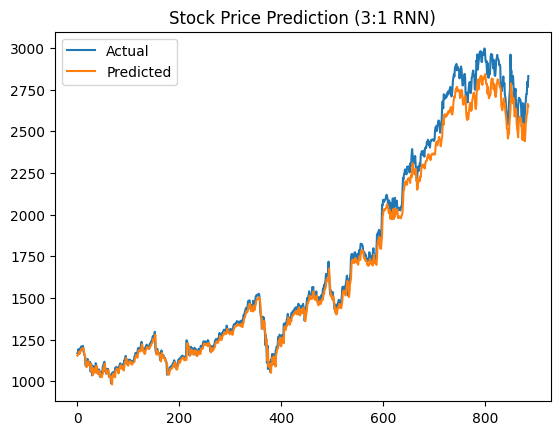

In [3]:
#PART A-1
data = pd.read_csv("GOOGL.csv")  
prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

X, y = [], []
window = 3
for i in range(len(scaled_prices) - window):
    X.append(scaled_prices[i:i+window, 0])
    y.append(scaled_prices[i+window, 0])
X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

pred = model.predict(X_test)
pred = scaler.inverse_transform(pred.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(actual, pred))
print("RMSE:", rmse)

plt.plot(actual, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("Stock Price Prediction (3:1 RNN)")
plt.show()

Epoch 1/50


C:\Users\SUDHARSAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5773e-05
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6631e-05
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5764e-05
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6273e-05
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5729e-05
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6206e-05
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5596e-05
Epoch 9/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6743e-05
Epoch 10/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4920e-05
Epoch 11/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6036e-05
Epoch 12/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5592e-05
Epoch 13/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5194e-05
Epoch 14/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4594e-05
Epoch 15/50
111/

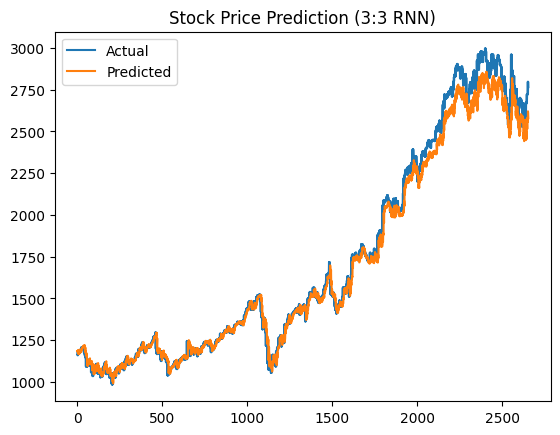

In [4]:
#PART A-2

data = pd.read_csv("GOOGl.csv")
prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

X, y = [], []
window = 3
out_window = 3
for i in range(len(scaled_prices) - window - out_window):
    X.append(scaled_prices[i:i+window, 0])
    y.append(scaled_prices[i+window:i+window+out_window, 0])
X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1)),
    Dense(out_window)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
actual = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(actual, pred))
print("RMSE:", rmse)

plt.plot(actual.flatten(), label="Actual")
plt.plot(pred.flatten(), label="Predicted")
plt.legend()
plt.title("Stock Price Prediction (3:3 RNN)")
plt.show()

Epoch 1/50


C:\Users\SUDHARSAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4822/4822 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0017
Epoch 2/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.9972e-04
Epoch 3/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.7101e-04
Epoch 4/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.4752e-04
Epoch 5/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.3749e-04
Epoch 6/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 5.2522e-04
Epoch 7/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 5.1447e-04
Epoch 8/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.0700e-04
Epoch 9/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 5.0348e-04
Epoch 10/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 4.9218e-04
Epoch 11/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 4.9339e-04
Epoch 12/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 4.8864e-04
Epoch 13/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 4.8473e-04
Epoch 14/50
4822/4822 ━━━━━━━━━━━━━━━━━━━━ 17s 3m

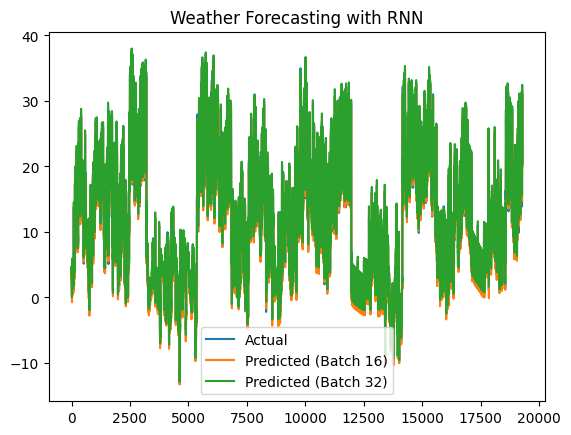

In [8]:
#PART B
data = pd.read_csv("weatherHistory.csv")

features = data[['Temperature', 'Humidity','Pressure']].values
target = data['Temperature'].values

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

features_scaled = scaler_x.fit_transform(features)
target_scaled = scaler_y.fit_transform(target.reshape(-1, 1))

X, y = [], []
window = 30
for i in range(len(features_scaled) - window):
    X.append(features_scaled[i:i+window])
    y.append(target_scaled[i+window])
X, y = np.array(X), np.array(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

def build_and_train(batch_size):
    model = Sequential([
        SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=1)
    return model

model_16 = build_and_train(16)
model_32 = build_and_train(32)

pred_16 = model_16.predict(X_test)
pred_16 = scaler_y.inverse_transform(pred_16)
actual = scaler_y.inverse_transform(y_test)

mae_16 = mean_absolute_error(actual, pred_16)
rmse_16 = np.sqrt(mean_squared_error(actual, pred_16))
print("Batch 16 → MAE:", mae_16, "RMSE:", rmse_16)

pred_32 = model_32.predict(X_test)
pred_32 = scaler_y.inverse_transform(pred_32)

mae_32 = mean_absolute_error(actual, pred_32)
rmse_32 = np.sqrt(mean_squared_error(actual, pred_32))
print("Batch 32 → MAE:", mae_32, "RMSE:", rmse_32)

plt.plot(actual, label="Actual")
plt.plot(pred_16, label="Predicted (Batch 16)")
plt.plot(pred_32, label="Predicted (Batch 32)")
plt.legend()
plt.title("Weather Forecasting with RNN")
plt.show()